# A brief introduction to image processing in Python
<br>Satellite images are just arrays of data</br>
<br>Fortunately in Python we can handle this data in a numpy array</br>

![alt text](rawpixel-602144-unsplash-768x531.jpg "Title")

# First time with Python?
Go here
http://www.acgeospatial.co.uk/python-geospatial-workflows-prt1-anaconda/
<br>first time with Jupyter Notebooks? go here</br>
http://www.acgeospatial.co.uk/workflows-prt2-jupyter_notebooks/

Common imports...
<br>Matplotlib for plotting</br>
<br>gdal for image processing</br>
<br>numpy for arrays</br>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt ### for plotting
from osgeo import gdal, gdal_array, ogr

import numpy as np

In [2]:
#!pip install matplotlib ### if not working

# Fake some data first

In [3]:
array2d = np.random.randint(25, size =(10,12))
print (array2d)

[[ 5  4  3 20 23 20  1 22 12 18 14  2]
 [18  6 15 18 21 19 15  1 21 11  5 10]
 [19  6  7 10 17  4 11 24  0 10 15 21]
 [ 4  2  5 23 18  7 10 12  2  3  0  8]
 [24 21 13 15 17  0 21  2 10  0 22 16]
 [16 23 24 10 11  3 22 13  9 21 17  0]
 [19  9  7 19 18  9 16  2 11  7  6  7]
 [18 24  1  3  1 14  6 10 13  2 24  6]
 [ 2 10  2 18 16  5 11 15 10  2 21  3]
 [ 2  2 23  7  8 16 12 22 11 17 21 20]]


# Plot that data!

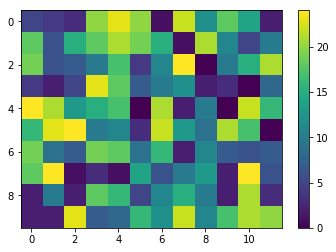

In [4]:
plt.imshow(array2d)
plt.colorbar()
plt.show()

# Manipulate the data
where the values are less than 10 set to 0 else leave as they were

In [5]:
b = np.where(array2d<10,0,array2d)
print (b)

[[ 0  0  0 20 23 20  0 22 12 18 14  0]
 [18  0 15 18 21 19 15  0 21 11  0 10]
 [19  0  0 10 17  0 11 24  0 10 15 21]
 [ 0  0  0 23 18  0 10 12  0  0  0  0]
 [24 21 13 15 17  0 21  0 10  0 22 16]
 [16 23 24 10 11  0 22 13  0 21 17  0]
 [19  0  0 19 18  0 16  0 11  0  0  0]
 [18 24  0  0  0 14  0 10 13  0 24  0]
 [ 0 10  0 18 16  0 11 15 10  0 21  0]
 [ 0  0 23  0  0 16 12 22 11 17 21 20]]


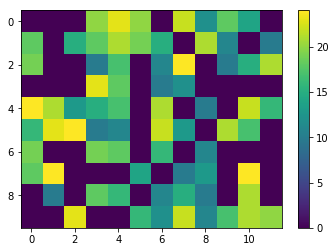

In [6]:
plt.imshow(b)
plt.colorbar()
plt.show()

In [7]:
c = np.where(b>=10,1,b)
print (c)

[[0 0 0 1 1 1 0 1 1 1 1 0]
 [1 0 1 1 1 1 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 0 0 0]
 [1 1 1 1 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 0 1 1 0 1 1 0]
 [1 0 0 1 1 0 1 0 1 0 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0]
 [0 1 0 1 1 0 1 1 1 0 1 0]
 [0 0 1 0 0 1 1 1 1 1 1 1]]


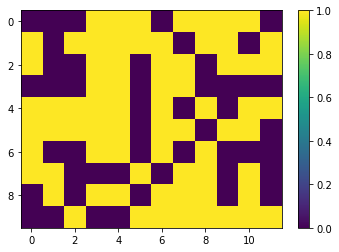

In [8]:
plt.imshow(c)
plt.colorbar()
plt.show()

# Another Way to consider

In [9]:
d = np.copy(array2d)
temp = np.less(d, 10)
np.putmask(d, temp, 0)
temp = np.greater_equal(d, 10)
np.putmask(d, temp, 1)
print (d)

[[0 0 0 1 1 1 0 1 1 1 1 0]
 [1 0 1 1 1 1 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 0 1 1 1]
 [0 0 0 1 1 0 1 1 0 0 0 0]
 [1 1 1 1 1 0 1 0 1 0 1 1]
 [1 1 1 1 1 0 1 1 0 1 1 0]
 [1 0 0 1 1 0 1 0 1 0 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0]
 [0 1 0 1 1 0 1 1 1 0 1 0]
 [0 0 1 0 0 1 1 1 1 1 1 1]]


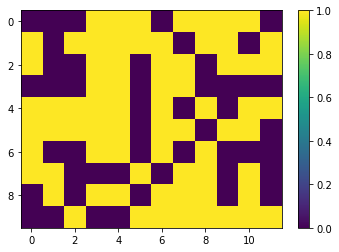

In [10]:
plt.imshow(d)
plt.colorbar()
plt.show()

In [11]:
print (array2d)

[[ 5  4  3 20 23 20  1 22 12 18 14  2]
 [18  6 15 18 21 19 15  1 21 11  5 10]
 [19  6  7 10 17  4 11 24  0 10 15 21]
 [ 4  2  5 23 18  7 10 12  2  3  0  8]
 [24 21 13 15 17  0 21  2 10  0 22 16]
 [16 23 24 10 11  3 22 13  9 21 17  0]
 [19  9  7 19 18  9 16  2 11  7  6  7]
 [18 24  1  3  1 14  6 10 13  2 24  6]
 [ 2 10  2 18 16  5 11 15 10  2 21  3]
 [ 2  2 23  7  8 16 12 22 11 17 21 20]]


# Useful things to know / get familiar with
What is the shape of my array?

In [12]:
print (array2d.shape)

(10, 12)


Remember when we ran this command array2d = np.random.randint(25, size =(10,12))
<br> the size parameter is the 'shape'</br>
<br> 3d array? </br>

In [13]:
array3d = np.random.randint(25, size =(10,12,3))

In [14]:
print (array3d.shape)

(10, 12, 3)


# Useful things to know / get familiar with
What is data type of my array?

In [15]:
print(array3d.dtype)

int32


# You can still plot a 3D array

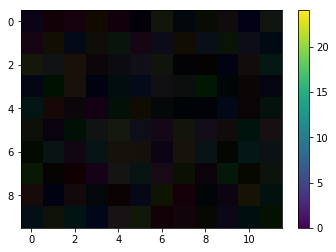

In [16]:
plt.imshow(array3d)
plt.colorbar()
plt.show()

### Perhaps more meaningful to to slice the data?

# Useful things to know / get familiar with
How to extract a 2d slice from a 3d array?

In [17]:
print(array3d[:,:,0])
print ()
print (array3d[:,:,1])
print ()
print (array3d[:,:,2])

[[10 18 21 18 16  4 17  2  9 17  3 17]
 [21 17  3 15  9 20 11 17 10  9 12  1]
 [21 17 24 12 12 16 17  3  5  1 18  5]
 [ 4  1 24  1  2  6 15 12  0  0 11  4]
 [ 3 22 10 20  3 16  4  0  2  0  9  4]
 [14  8  1 15 20 13 20 19 18 16  0 23]
 [ 2  8 16  5 22 20 12 24  7  4  4 12]
 [10  5 17 21 20  8 23 12 10  3  7 13]
 [22  1 18  4 11  6 15 21  1 13 22  3]
 [ 4 14  2  1 23 17 18 17  7 12  1  4]]

[[ 4  2  2  9  1  0 21  8 12 11  1 21]
 [ 4 15 10 13 21  7 12 12 14 20 13  9]
 [23 18 16  6 12 14 19  2  3  3 12 23]
 [ 5 17 16  2 13  9 14 14 23  5  6  5]
 [21  8  6  0 16 12  8  4  3  9  4 17]
 [16  3 16 19 24 14  8 21 13 12 19 16]
 [10 19  7 19 17 16  3 18 19  6 23 18]
 [23  4  0  2 21 18  9 15  4 24  8 18]
 [11  2  9  7  2  8 19  0  5  4 19 17]
 [14 17 19  7 18 24  0  4  8  7 14 17]]

[[22  7 12  0 10  9 10 11  4 14 22 17]
 [17  4 22  8 12 19 24  4 23  7 23 19]
 [10 20  9 11 16 22 13  4  2 19 12 19]
 [19  1 10 15 14 23 16 13  4  7  6 15]
 [18  6 10 21  8  1  8  6  9 21  6 12]
 [ 7 15  7 18 14 24 2

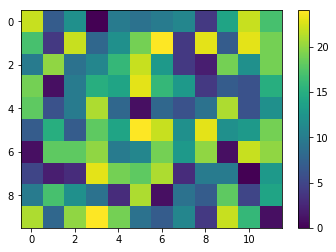

In [18]:
plt.imshow(array3d[:,:,2])
plt.colorbar()
plt.show()

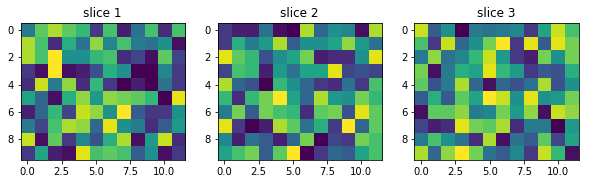

In [19]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("slice 1")
plt.imshow(array3d[:,:,0])
plt.subplot(1, 3, 2)
plt.title("slice 2")
plt.imshow(array3d[:,:,1])
plt.subplot(1, 3, 3)
plt.title("slice 3")
plt.imshow(array3d[:,:,2])

<br>We can do plenty of other things, image slicing, statistics, reshapeing the data etc. </br>
<br>If you want to learn more then I have 2 training courses on basics and intermediate Geospatial Python</br>
<br>email me info@acgeospatial.co.uk</br>


learn more about array broadcasting here
https://machinelearningmastery.com/broadcasting-with-numpy-arrays/

# Opening images
gdal

In [20]:
!gdalinfo S2_may_South_coast_clip_int2.tif

Driver: GTiff/GeoTIFF
Files: S2_may_South_coast_clip_int2.tif
Size is 751, 519
Coordinate System is:
PROJCS["WGS 84 / UTM zone 30N",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Transverse_Mercator"],
    PARAMETER["latitude_of_origin",0],
    PARAMETER["central_meridian",-3],
    PARAMETER["scale_factor",0.9996],
    PARAMETER["false_easting",500000],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["Easting",EAST],
    AXIS["Northing",NORTH],
    AUTHORITY["EPSG","32630"]]
Origin = (647800.000000000000000,5631040.000000000000000)
Pixel Size = (10.000000000000000,-10.000000000000000)
Metadata:
  AREA_OR_

(519, 751)


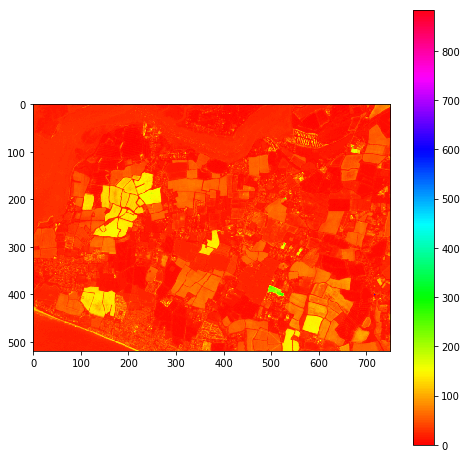

In [21]:
datain = "S2_may_South_coast_clip_int2.tif" 

raster_ds = gdal.Open(datain, gdal.GA_ReadOnly)
image_gdal = raster_ds.GetRasterBand(2).ReadAsArray() ## get the second band

print (image_gdal.shape)
plt.figure(figsize=(8,8))
plt.imshow(image_gdal, cmap='hsv')
plt.colorbar()
plt.show()

### This is only 1 band
##### Lets read all the bands in as a numpy array

In [22]:
datain = "S2_may_South_coast_clip_int2.tif"

img_ds = gdal.Open(datain, gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))


print (gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

print (img.shape)
print ("loading image into array")

## now loop over the empty array and populate it

print (img.shape[2])

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
print (img.shape)





<class 'numpy.uint16'>
(519, 751, 13)
loading image into array
13
(519, 751, 13)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(519, 751, 3)


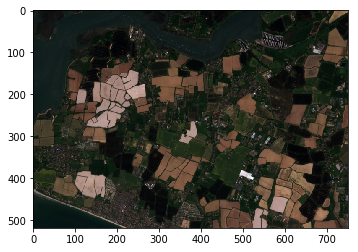

In [23]:
## Assigning red, green and blue

r = img[:, :, 3] = img_ds.GetRasterBand(4).ReadAsArray()
g = img[:, :, 2] = img_ds.GetRasterBand(3).ReadAsArray()
b = img[:, :, 1] = img_ds.GetRasterBand(2).ReadAsArray()

## stacking the data
rgb = np.stack([r, g, b],axis=2)
print (rgb.shape)
plt.imshow(rgb)
plt.show()

##Getting errors? consider this plt.imshow((out * 255).astype(np.uint8))

# Opening in Rasterio

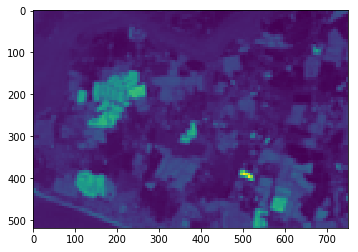

In [24]:
import rasterio
from rasterio import plot
src = rasterio.open(r"S2_may_South_coast_clip_int2.tif")
plot.show(src)

In [25]:
print (src.count)
array = src.read()
print (array.shape)

13
(13, 519, 751)


In [26]:
red = src.read(4)
green = src.read(3)
blue = src.read(2)
print (blue.shape)

(519, 751)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 519, 751)


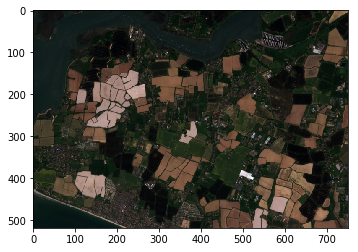

In [27]:
rgb2 = np.stack([red, green, blue])
print (rgb2.shape)
plot.show(rgb2)

##Getting errors? consider this plt.imshow((out * 255).astype(np.uint8))

## Processing images
<br>Now that we know are data is in a numpy array we can do any of the functions you can do on an array on the image</br>
#### Histogram Equalize

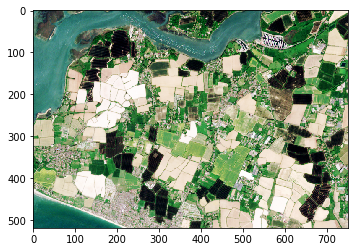

In [28]:
from skimage import exposure
img_eq = exposure.equalize_hist(rgb2)
plot.show(img_eq)

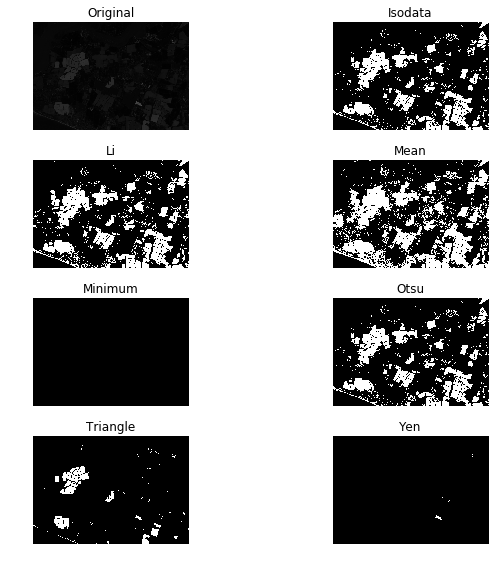

In [29]:
##http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html
##http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html#sphx-glr-auto-examples-xx-applications-plot-thresholding-py

## We must use a gray scale image though

from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(blue, figsize=(10, 8), verbose=False)
plt.show()


<br>We can do plenty of other things stretches, masking, histogram plotting </br>
<br>If you want to learn more then I have 2 training courses on basics and intermediate Geospatial Python</br>
<br>email me info@acgeospatial.co.uk</br>

## Computer Vision

In [30]:
!gdal_translate -b 4 -b 3 -b 2 -ot Byte "S2_may_South_coast_clip_int2.tif" "rgb_byte.tif" -scale

Input file size is 751, 519
0...10...20...30...40...50...60...70...80...90...100 - done.


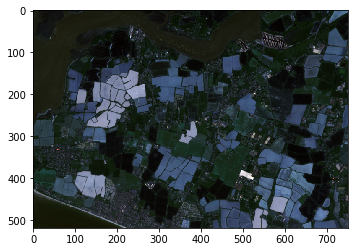

In [31]:
import cv2
import numpy as np

img = cv2.imread("rgb_byte.tif")
plt.imshow(img)
plt.show()

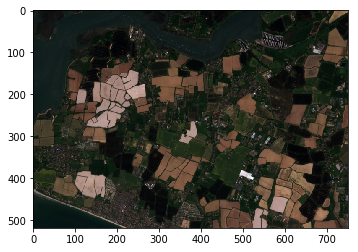

In [32]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

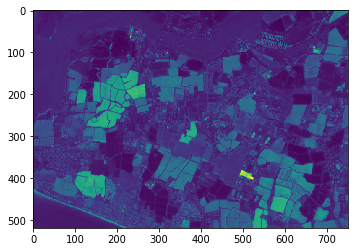

In [33]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.show()

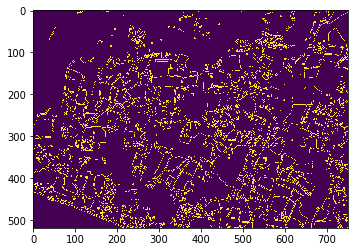

In [34]:
edges = cv2.Canny(img,100,200)
plt.imshow(edges)
plt.show()

<br>We can do plenty of other things thresholding, blob detection, watershed analysis etc </br>
<br>Computer vision is fast!</br>
<br>If you want to learn more then I have 2 training courses on basics and intermediate Geospatial Python</br>
<br>email me info@acgeospatial.co.uk</br>

## I also cover...
### Machine learning using Python and Satellite imagery
### PostGIS loading
### Vectorisation
### Advanced slicing

![alt text](Picture1-768x429.png "Title")